In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk
from sklearn.linear_model import Lasso
from time import time 

In [2]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
data.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)


In [5]:
#Checking for unique values to underatand the range of each column
for column_name, column_data in data.items():
    unique_values = column_data.unique()
    print(f"{column_name} --> {unique_values}")

Diabetes --> [0. 2. 1.]
HighBP --> [1. 0.]
HighChol --> [1. 0.]
CholCheck --> [1. 0.]
BMI --> [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker --> [1. 0.]
Stroke --> [0. 1.]
HeartDiseaseorAttack --> [0. 1.]
PhysActivity --> [0. 1.]
Fruits --> [0. 1.]
Veggies --> [1. 0.]
HvyAlcoholConsump --> [0. 1.]
AnyHealthcare --> [1. 0.]
NoDocbcCost --> [0. 1.]
GenHlth --> [5. 3. 2. 4. 1.]
MentHlth --> [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth --> [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk --> [1. 0.]
Sex --> [0. 1.]
Age

<p><h5>Here we can see that every column is already filtered in Categorical Data<h5> 

In [27]:
#Checking for Data Imbalance
diabetes_counts = data['Diabetes'].value_counts()
print(diabetes_counts)

#since the categorical values of Diabetes == 1 are categorized as "Prediabetic" we wil; consider as "Diabetic" only!


data.loc[data['Diabetes'] == 2, 'Diabetes'] = 1
diabetes_counts = data['Diabetes'].value_counts()


Diabetes
0.0    213703
1.0     39977
Name: count, dtype: int64


<h4>Here, we can see that the values are imabalanced </h4>
<h7>--> There are two methods by which we can solve this issue</h7><br>
<h7> * Adding Synthetic values to the minority class </h7></br>
<h7> * Removing few values from the majority class <h7></br>

<h1>Approach 1 --> adding synthetic data from the original data

In [28]:
#Approach 1 adding synthetic data from the original data

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Separate features (X) and target variable (y)
X = data.drop(columns=['Diabetes']).values
y = data['Diabetes'].values

# Counting the occurrences of each class
class_counts = data['Diabetes'].value_counts()

# Determining the desired number of instances for each class
desired_count = class_counts.max()

# Undersample the majority class
rus = RandomUnderSampler(sampling_strategy={0: desired_count})
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Oversampling the minority class to match the desired count
smote = SMOTE(sampling_strategy={1: desired_count})
X_oversampled, y_oversampled = smote.fit_resample(X_undersampled, y_undersampled)

# Combining the undersampled and oversampled data
X_combined = np.vstack((X_undersampled, X_oversampled))
y_combined = np.concatenate((y_undersampled, y_oversampled))

X_combined.info()


AttributeError: 'NoneType' object has no attribute 'split'

In [10]:
synthetic_data = df_combined
synthetic_data

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.000000,1.000000,1.0,40.000000,1.000000,0.0,0.000000,1.0,1.000000,...,1.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000,4.000000
1,0.0,0.000000,0.000000,1.0,25.000000,0.000000,0.0,0.000000,0.0,0.000000,...,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,6.000000
2,0.0,1.000000,1.000000,1.0,24.000000,0.000000,1.0,1.000000,1.0,0.000000,...,1.0,0.000000,3.000000,15.000000,10.000000,0.000000,0.000000,13.000000,4.000000,4.000000
3,0.0,0.000000,0.000000,1.0,19.000000,0.000000,0.0,0.000000,1.0,1.000000,...,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,8.000000
4,0.0,0.000000,1.000000,1.0,33.000000,0.000000,1.0,1.000000,1.0,1.000000,...,1.0,1.000000,4.000000,10.000000,7.000000,1.000000,1.000000,8.000000,5.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681081,1.0,1.000000,1.000000,1.0,28.000000,0.093986,0.0,0.906014,0.0,1.000000,...,1.0,0.000000,5.000000,0.000000,30.000000,0.000000,0.093986,13.000000,4.906014,4.000000
681082,1.0,1.000000,0.295853,1.0,34.000000,0.000000,0.0,0.000000,1.0,0.295853,...,1.0,0.000000,3.000000,1.000000,2.000000,0.000000,1.000000,9.000000,4.704147,7.295853
681083,1.0,1.000000,1.000000,1.0,33.000000,0.621172,0.0,0.621172,0.0,0.000000,...,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.621172,6.621172
681084,1.0,1.000000,1.000000,1.0,36.000000,1.000000,0.0,0.391352,0.0,0.608648,...,1.0,0.000000,3.608648,0.000000,0.391352,0.000000,0.608648,8.000000,5.608648,4.000000


In [11]:

diabetes_counts = synthetic_data['Diabetes'].value_counts()
print(diabetes_counts)

0.0    427406
1.0    253680
Name: Diabetes, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error


#Separate the features (X) and target variable (y)
X = synthetic_data.drop(columns=['Diabetes']).values
y = synthetic_data['Diabetes'].values

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

#Predict on the testing set
y_pred = logistic_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Evaluating the mse as well!
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.745598966362742
Mean Squared Error: 0.2544010336372579

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80     85494
         1.0       0.68      0.60      0.64     50724

    accuracy                           0.75    136218
   macro avg       0.73      0.72      0.72    136218
weighted avg       0.74      0.75      0.74    136218



In [14]:
#Printing the confusion metrics of Synthetic Data inclusion 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70935 14559]
 [20095 30629]]


<h4>Approach 2 --> Implementing UnderSampling of Majority 

In [15]:

from imblearn.under_sampling import RandomUnderSampler

undersampling_data = data

X = undersampling_data.drop(columns=['Diabetes']).values
y = undersampling_data['Diabetes'].values
unique_classes, class_counts = np.unique(y, return_counts=True)

# Determine the desired number of instances for class "1" (minority class)
desired_count = class_counts[unique_classes == 1]  # Assuming class "1" is the minority class

# Undersample class "0" to match the count of class "1" using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={0: desired_count})
X_US_resampled, y_US_resampled = rus.fit_resample(X, y)

# Count the occurrences of each class in the resampled data
resampled_unique_classes, resampled_class_counts = np.unique(y_US_resampled, return_counts=True)
print(dict(zip(resampled_unique_classes, resampled_class_counts)))


{0.0: 39977, 1.0: 39977}


In [16]:
undersampled_data = np.hstack((y_US_resampled.reshape(-1, 1), X_US_resampled))
df_underSampled = pd.DataFrame(undersampled_data, columns=data.columns)
df_underSampled

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
1,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,6.0,7.0
2,0.0,1.0,1.0,1.0,41.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,30.0,2.0,0.0,1.0,4.0,3.0,1.0
3,0.0,1.0,1.0,0.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,7.0,0.0,0.0,11.0,6.0,8.0
4,0.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79949,1.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0
79950,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
79951,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
79952,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


0.0    39977
1.0    39977
Name: Diabetes, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

X = df_underSampled.drop(columns=['Diabetes']).values
y = df_underSampled['Diabetes'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluating the mse as well!
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7327246576199112
Mean Squared Error: 0.2672753423800888

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73      8027
         1.0       0.72      0.75      0.74      7964

    accuracy                           0.73     15991
   macro avg       0.73      0.73      0.73     15991
weighted avg       0.73      0.73      0.73     15991

[[5708 2319]
 [1955 6009]]


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h4>Combined Approach --> Oversampling the Minority class and Undersampling the Majority Class

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

combinedData = data
# Separate features (X) and target variable (y)
X = combinedData.drop(columns=['Diabetes']).values
y = combinedData['Diabetes'].values

# Count the occurrences of each class
class_counts = combinedData['Diabetes'].value_counts()

# Determine the desired number of instances for each class
desired_count = class_counts.min()  # We undersample to match the count of the minority class

# Undersample the majority class
rus = RandomUnderSampler(sampling_strategy={0: desired_count})
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Oversample the minority class to match the desired count
smote = SMOTE(sampling_strategy={1: desired_count})
X_oversampled, y_oversampled = smote.fit_resample(X_undersampled, y_undersampled)

# Combine the undersampled and oversampled data
X_combined = np.vstack((X_undersampled, X_oversampled))
y_combined = np.concatenate((y_undersampled, y_oversampled))
combinedApproach_array = np.concatenate((y_combined.reshape(-1, 1), X_combined), axis=1)

# Create a DataFrame from the concatenated array
df_combinedApproach = pd.DataFrame(combinedApproach_array, columns=['Diabetes'] + list(data.drop(columns=['Diabetes']).columns))

# Display the DataFrame
print(df_combinedApproach)


        Diabetes  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0            0.0     1.0       1.0        1.0  43.0     1.0     0.0   
1            0.0     0.0       0.0        1.0  25.0     1.0     0.0   
2            0.0     1.0       1.0        1.0  32.0     0.0     0.0   
3            0.0     1.0       0.0        1.0  30.0     0.0     0.0   
4            0.0     0.0       0.0        1.0  32.0     0.0     0.0   
...          ...     ...       ...        ...   ...     ...     ...   
159903       1.0     1.0       0.0        1.0  23.0     0.0     0.0   
159904       1.0     0.0       1.0        1.0  29.0     1.0     0.0   
159905       1.0     1.0       1.0        1.0  25.0     0.0     0.0   
159906       1.0     1.0       1.0        1.0  18.0     0.0     0.0   
159907       1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     1.0  ...            1.0   

In [21]:
diabetes_counts = df_combinedApproach['Diabetes'].value_counts()
print(diabetes_counts)

0.0    79954
1.0    79954
Name: Diabetes, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

# Separate the features (X) and target variable (y)
X = df_combinedApproach.drop(columns=['Diabetes']).values
y = df_combinedApproach['Diabetes'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluating the mse as well!
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)


Accuracy: 0.7375711337627415
Mean Squared Error: 0.2624288662372585

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     15802
         1.0       0.73      0.75      0.74     16180

    accuracy                           0.74     31982
   macro avg       0.74      0.74      0.74     31982
weighted avg       0.74      0.74      0.74     31982

[[11378  4424]
 [ 3969 12211]]


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h7>Undersampling:</h7>
<h6>Accuracy: 0.7387<br>
<h6>MSE: 0.2613<br>
<h6>Precision, Recall, and F1-score: Balanced performance for both classes.<br>
<h5>-------------------------------------------------------------------------------<br>
<h7>Oversampling:</h7>
<h6>Accuracy: 0.7467<br>
<h6>MSE:0.2533 <br>
<h6>Precision, Recall, and F1-score: Slightly better performance for class 0, but balanced overall.
<br>
<h5>-------------------------------------------------------------------------------<br>
<h7>Combination of OverSampling and Undersampling:</h7>
<h6>Accuracy: 0.7361<br>
<h6>MSE: 0.2639<br>
<h6>Precision, Recall, and F1-score: Balanced performance for both classes.<br>
<h6>==================================================================================================<br>
<h5> Therefore, selecting the OverSampled Logistic Regression as Baseline Model


<h1>Applying Covariance Matrix</h1>

In [24]:
cov_matrix = np.cov(df_combinedApproach, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.50001563e-01  9.09653736e-02  7.07661328e-02  8.73007436e-03
   1.02909191e+00  2.03680890e-02  1.42207658e-02  3.53392910e-02
  -3.65712570e-02 -1.40956931e-02 -1.60718418e-02 -8.61750893e-03
   2.06995316e-03  7.40430375e-03  2.19946594e-01  3.73248201e-01
   1.03325683e+00  5.65140988e-02  9.80569956e-03  3.85355238e-01
  -8.95895739e-02 -2.46931029e-01]
 [ 9.09653736e-02  2.46818334e-01  7.81867952e-02  7.94152505e-03
   8.20486464e-01  2.18235725e-02  1.47415140e-02  3.57764302e-02
  -2.95590462e-02 -9.89170804e-03 -1.38794322e-02 -2.22754673e-03
   3.46819895e-03  4.08941796e-03  1.74639490e-01  2.61728751e-01
   8.44342730e-01  5.01641036e-02  1.09288100e-02  4.75273356e-01
  -7.46766950e-02 -2.02320404e-01]
 [ 7.07661328e-02  7.81867952e-02  2.49478265e-01  6.72637293e-03
   4.32622580e-01  2.23326662e-02  1.09361050e-02  3.10425767e-02
  -2.05392735e-02 -1.07174034e-02 -9.54201852e-03 -2.11502948e-03
   3.39886349e-03  4.39603457e-03  1.29921483e-01  3.

<h1>Finding Correlations b/w the features and finding Features with "Standard Correlation"

In [25]:
correlationMatrix = synthetic_data.corr()
print("Correlation Matrix -->")
print(correlationMatrix)

Correlation Matrix -->
                      Diabetes    HighBP  HighChol  CholCheck       BMI  \
Diabetes              1.000000  0.375210  0.295083   0.106419  0.282357   
HighBP                0.375210  1.000000  0.332819   0.110852  0.244075   
HighChol              0.295083  0.332819  1.000000   0.093943  0.130134   
CholCheck             0.106419  0.110852  0.093943   1.000000  0.045971   
BMI                   0.282357  0.244075  0.130134   0.045971  1.000000   
Smoker                0.083811  0.100555  0.101108  -0.004623  0.017199   
Stroke                0.110083  0.132921  0.099168   0.025145  0.023444   
HeartDiseaseorAttack  0.199957  0.220482  0.191612   0.046908  0.062024   
PhysActivity         -0.146440 -0.141214 -0.093657  -0.003782 -0.170262   
Fruits               -0.046628 -0.042980 -0.046049   0.019914 -0.091291   
Veggies              -0.060678 -0.064607 -0.043881   0.003534 -0.062399   
HvyAlcoholConsump    -0.094128 -0.027180 -0.027278  -0.029138 -0.058449   
An

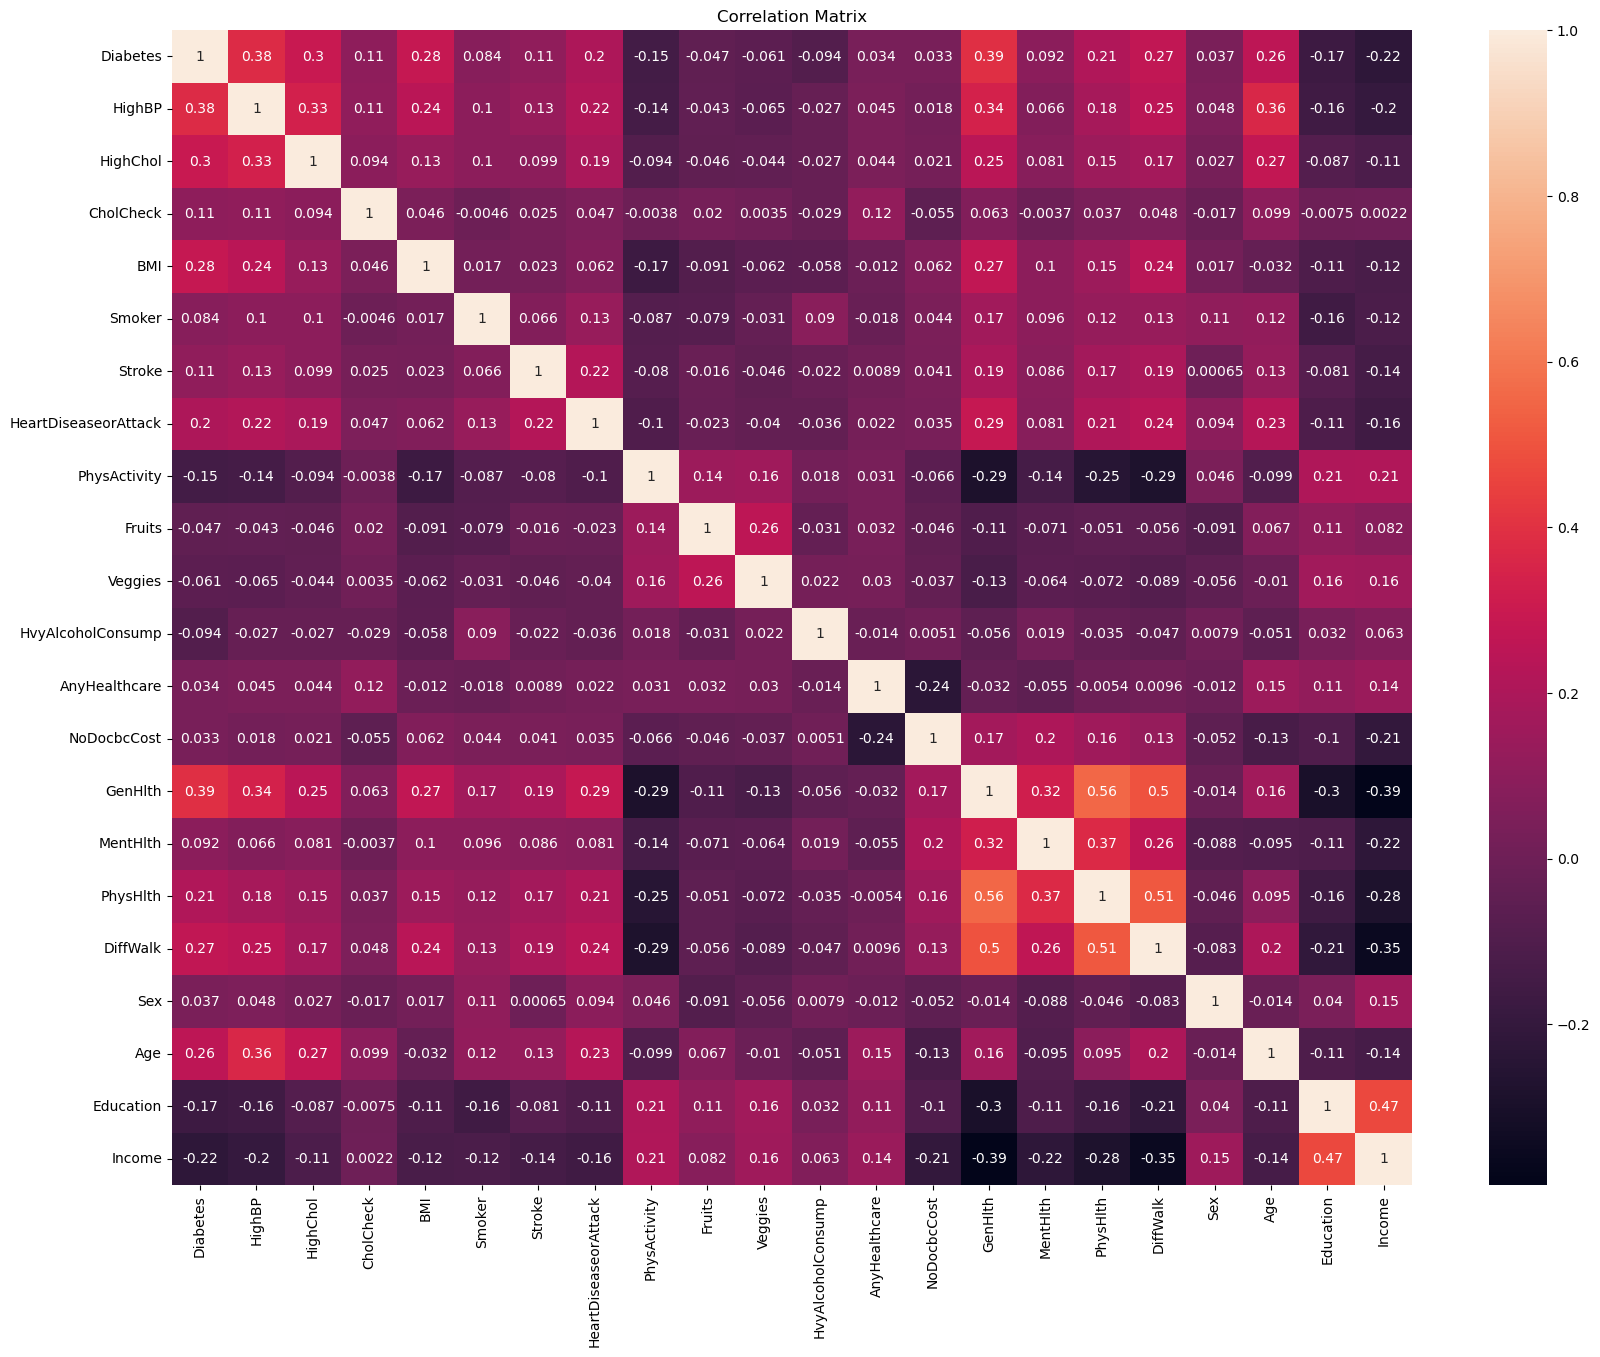

In [26]:
#Plot the correlation graph 

plt.figure(figsize=(20,15))
sns.heatmap(correlationMatrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [81]:
#spliting the dataset in train and split 

from sklearn.model_selection import train_test_split
X_data = df_combinedApproach.drop(columns=['Diabetes']).values
y_data = df_combinedApproach['Diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)


In [82]:
X = df_combinedApproach.drop(columns=['Diabetes'])
y = df_combinedApproach['Diabetes']

<h1>Applying Bootstrapping to L1 regularization and selecting features

In [85]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import Lasso

def stability_selection(X, y, n_subsamples, alphas, n_iterations, threshold=0.6):
    n_samples, n_features = X.shape
    feature_counts = {alpha: np.zeros(n_features) for alpha in alphas}

    for _ in range(n_iterations):
        # Bootstrap subsampling
        X_sub, y_sub = resample(X, y, n_samples=n_subsamples)

        # Perform stability selection for each alpha
        for alpha in alphas:
            # Fit Lasso with current alpha
            lasso = Lasso(alpha=alpha).fit(X_sub, y_sub)
            selected_features = np.where(lasso.coef_ != 0)[0]

            # Update feature counts for current alpha
            feature_counts[alpha][selected_features] += 1

    # Calculate stability scores for each feature and alpha
    stability_scores = {alpha: counts / n_iterations for alpha, counts in feature_counts.items()}

    # Select features for each alpha based on stability score threshold
    selected_features_per_alpha = {alpha: np.where(scores > threshold)[0] for alpha, scores in stability_scores.items()}

    return selected_features_per_alpha


n_subsamples = 1000  # Number of samples in each bootstrap subsample
alphas = [0.01, 0.05,0.06,0.09,0.1,0.6,0.8,1.0]  # List of alpha values for Lasso regularization
n_iterations = 100  # Number of bootstrap iterations
threshold = 0.6  # Stability selection threshold

selected_features_per_alpha = stability_selection(X, y, n_subsamples, alphas, n_iterations, threshold)

# Print selected features for each alpha
for alpha, selected_features in selected_features_per_alpha.items():
    print(f"Selected features for alpha={alpha}: {selected_features}")


print(selected_features)
selected_column_names = [X.columns[i] for i in selected_features]
print("Selected column names based on stability selection:")
print(selected_column_names)
# Example usage for Stability Selection with Backward Feature Elimination (BFE)
# X: Feature matrix
# y: Target variable
# n_subsamples: Number of samples in each bootstrap subsample
# n_iterations: Number of bootstrap iterations
# threshold: Stability selection threshold (default is 0.6)
# Returns selected features based on stability selection with BFE


Selected features for alpha=0.01: [ 0  1  3 13 14 15 17 18 20]
Selected features for alpha=0.05: [ 3 13 14 15 18 20]
Selected features for alpha=0.06: [ 3 13 14 15 18 20]
Selected features for alpha=0.09: [ 3 13 15 18 20]
Selected features for alpha=0.1: [ 3 13 15 18 20]
Selected features for alpha=0.6: [ 3 15]
Selected features for alpha=0.8: [ 3 15]
Selected features for alpha=1.0: []
[]
Selected column names based on stability selection:
[]


<h7>--> X: Feature matrix, y: Target vector<br>
--> n_subsamples: Number of samples in each subsample<br>
--> alphas: List of L1 regularization parameters for Lasso (low to high)<br>
--> n_iterations: Number of iterations/bootstraps<br>
--> threshold: Stability selection threshold (default is 0.6)<br>
--> Returns selected features based on stability selection<br>

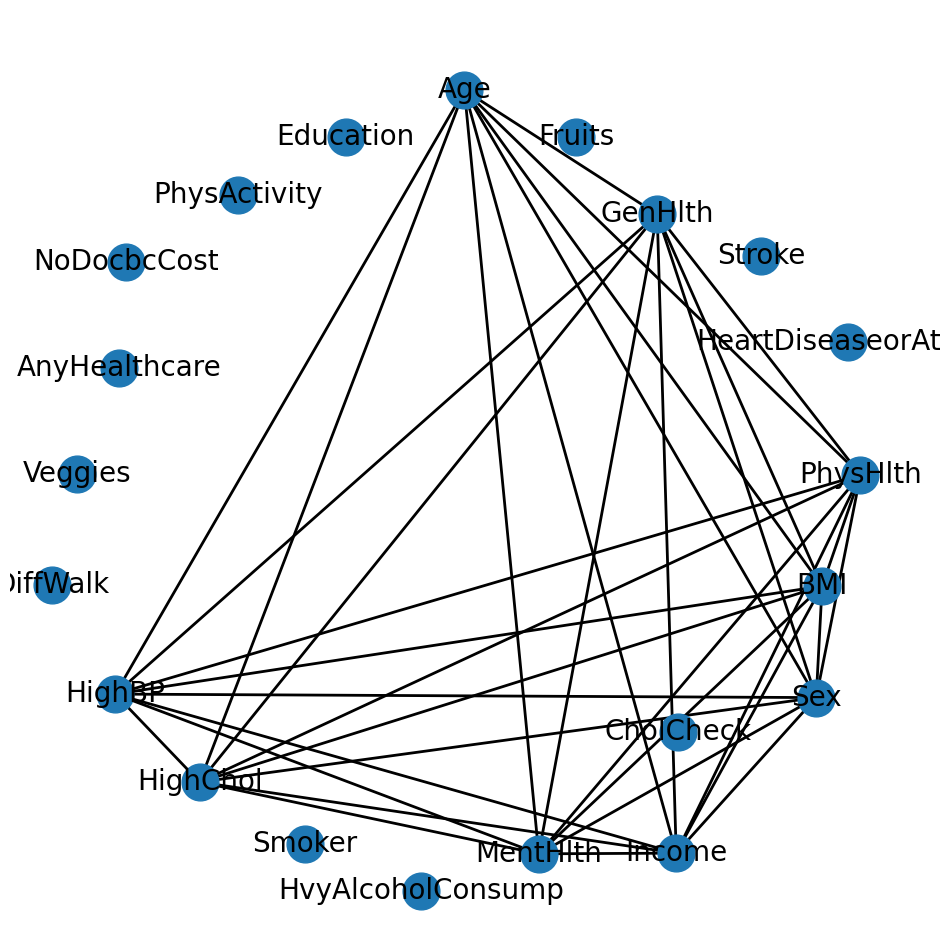

In [103]:
import networkx as nx
import matplotlib.pyplot as plt

# Assume `co_selection_matrix` is a symmetric matrix where the element [i, j]
# indicates how many times feature i and feature j were selected together.
# We'll initialize it with zeros for this example.
n_features = len(X.columns)  # Assuming X is a pandas DataFrame.
co_selection_matrix = np.zeros((n_features, n_features))

# Populate the co_selection_matrix based on your stability selection results.
# You will need to modify your stability selection function to fill this matrix.

# Now we create the network graph.
G = nx.Graph()

# Add nodes (features) to the graph.
for i in range(n_features):
    G.add_node(X.columns[i])  # Assuming each feature has a unique name.

# Add edges (co-selections) to the graph.

# We only add an edge if the co-selection count exceeds a certain threshold.
co_selection_threshold = 10  # Set the threshold as needed.
for i in range(n_features):
    for j in range(i+1, n_features):  # Ensure i < j to maintain symmetry.
        if co_selection_matrix[i, j] > co_selection_threshold:
            G.add_edge(X.columns[i], X.columns[j], weight=co_selection_matrix[i, j])

# Add edges for specific column numbers [0, 1, 3, 13, 14, 15, 17, 18, 20]
for i in [0, 1, 3, 13, 14, 15, 17, 18, 20]:
    for j in [0, 1, 3, 13, 14, 15, 17, 18, 20]:
        if i != j:  # Avoid self-loops
            G.add_edge(X.columns[i], X.columns[j], weight=co_selection_matrix[i, j])

# Draw the network graph.
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positions for all nodes.

# Draw nodes and edges.
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)

# Label nodes with the feature names.
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Show the graph.
plt.axis('off')
plt.show()


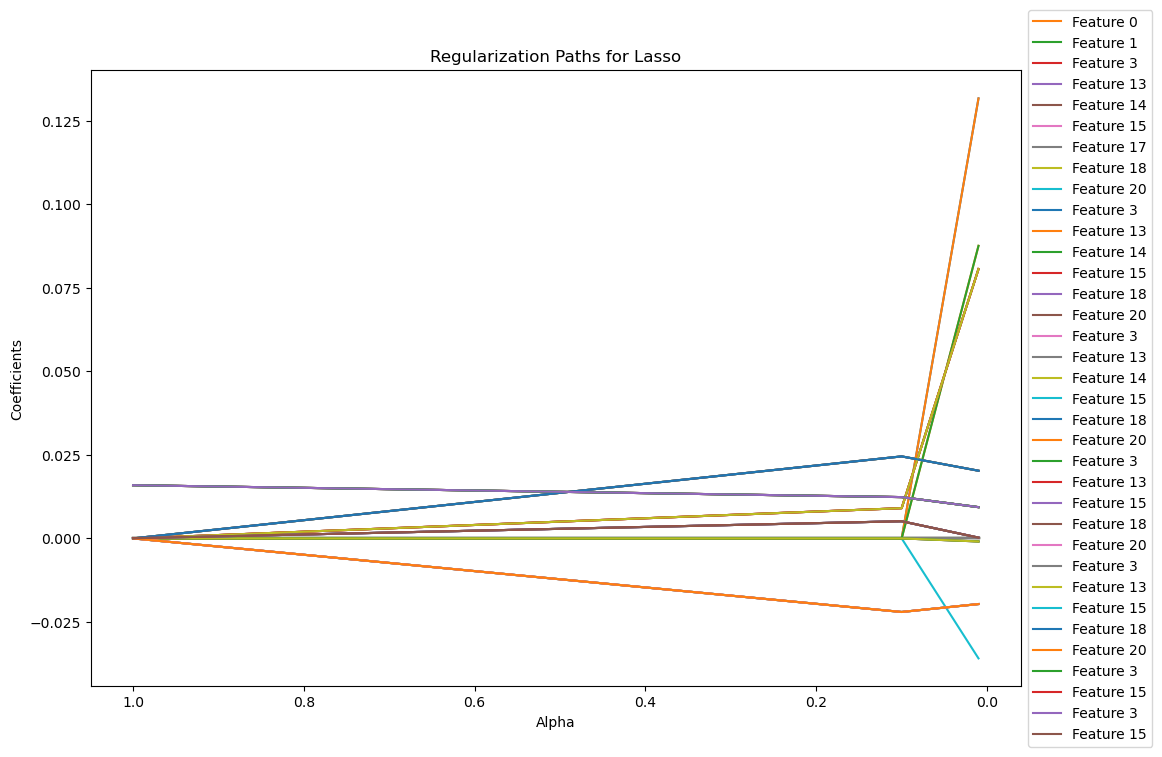

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path

# Assuming X and y are your feature matrix and target vector, respectively
# and 'alphas' is the list of alpha values from your stability selection code.

# Compute the Lasso path for the full dataset (not subsamples)
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, alphas=alphas)

# Plot the Lasso paths
plt.figure(figsize=(12, 8))

# Plot each coefficient path
for coef_l in coefs_lasso:
    plt.plot(alphas_lasso, coef_l)

# Assuming you want to highlight certain features, identify them by their indices
# For example, to highlight the first two features (indices 0 and 1)
for alpha, selected_features in selected_features_per_alpha.items():
    for feature_index in selected_features:
        plt.plot(alphas_lasso, coefs_lasso[feature_index], label=f'Feature {feature_index}')

# Additional plot customization
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Regularization Paths for Lasso')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_xaxis()  # Invert x-axis to have the highest alpha on the left as per convention
plt.show()


<h1>Now applying Stability selection for feature selection using Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample

def stability_selection_rf(X, y, n_subsamples, n_estimators, n_iterations, threshold=0.9):
    n_samples, n_features = X.shape
    selection_counts = np.zeros(n_features)
    
    for _ in range(n_iterations):
        # Bootstrap subsampling
        X_sub, y_sub = resample(X, y, n_samples=n_subsamples, replace=True)
        
        # Fit Random Forest regression
        rf = RandomForestRegressor(
            n_estimators=n_estimators,
            bootstrap=True,
            criterion ='absolute_error',
            
            )
        rf.fit(X_sub, y_sub)
        
        # Increment counts for selected features
        selection_counts += (rf.feature_importances_ > 0)
    
    # Calculate stability selection score for each feature
    stability_scores = selection_counts / n_iterations
    
    # Filter features based on stability score threshold
    selected_features = np.where(stability_scores > threshold)[0]
    
    return selected_features

# Example usage
# X: Feature matrix, y: Target vector
# n_subsamples: Number of samples in each subsample
# n_estimators: Number of trees in the Random Forest
# n_iterations: Number of iterations/bootstraps
# threshold: Stability selection threshold (default is 0.6)
# Returns selected features based on stability selection

# Assuming X is a NumPy array

selected_features_indices = stability_selection_rf(X, y, n_subsamples=100, n_estimators=100, n_iterations=100)
print(selected_features_indices)
selected_column_names = [X.columns[i] for i in selected_features_indices]
print("Selected column names based on stability selection:")
print(selected_column_names)


[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Selected column names based on stability selection:
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [47]:
import pickle
pickle_randomForest = selected_column_names
with open('pickle_randomForest', 'wb') as f:
    pickle.dump(pickle_randomForest,f)

<h7> Here we can see that the penalty function is quite low, thus even after heavy thresholding so skipping this method 

<h1> Applying Stability Selection using PCA

In [70]:
import numpy as np
from sklearn.utils import resample
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def explained_variance_ratio_score(estimator, X, y=None):
    evr = estimator.explained_variance_ratio_
    return np.sum(evr)

# Define a custom scorer based on explained variance ratio
evr_scorer = make_scorer(explained_variance_ratio_score)

def stability_selection_sparse_pca(X, n_components, n_subsamples, n_iterations, alphas, threshold=0.6):
    n_samples, n_features = X.shape
    selection_counts = np.zeros(n_features)
    
    for _ in range(n_iterations):
        # Bootstrap subsampling
        X_sub = resample(X, n_samples=n_subsamples, replace=True)
        
        # Fit Sparse PCA
        pca = SparsePCA(n_components=n_components)
        pca.fit(X_sub)
        
        # Increment counts for selected components
        selection_counts += (pca.components_ != 0).sum(axis=0)
    
    # Calculate stability selection score for each component
    stability_scores = selection_counts / n_iterations
    
    # Filter components based on stability score threshold
    selected_components = np.where(stability_scores > threshold)[0]
    
    return selected_components

n_components = 10  # Number of principal components
n_subsamples = 50  # Number of samples in each subsample
n_iterations = 100  # Number of iterations/bootstraps
alphas = [0.01, 0.1, 1.0, 10.0]  # List of alpha values for grid search
threshold = 0.6  # Stability selection threshold

# Perform grid search to find the best alpha
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(SparsePCA(n_components=n_components), param_grid, cv=5, scoring=evr_scorer)
grid_search.fit(X)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Perform stability selection with the best alpha
selected_components = stability_selection_sparse_pca(X, n_components, n_subsamples, n_iterations, best_alpha, threshold)

print("Selected components based on stability selection:")
print(selected_components)
print("Best alpha:", best_alpha)

selected_column_names = [X.columns[i] for i in selected_features_indices]
print("Selected column names based on stability selection:")
print(selected_column_names)


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^

Selected components based on stability selection:
[ 0  1  3  4  7  8 13 14 15 16 17 18 19 20]
Best alpha: 0.01
Selected column names based on stability selection:
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [71]:
import pickle
pickle_PCA_alpha_0 = selected_column_names
with open('pickle_PCA_alpha_0_01', 'wb') as f:
    pickle.dump(pickle_PCA_alpha_0,f)

<h1> Applying Stability Selection with Backward Selection

In [97]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import Lasso

def stability_selection_bfe(X, y, n_subsamples, alphas, n_iterations, threshold):
    n_samples, n_features = X.shape
    selection_counts = np.zeros((len(alphas), n_features))
    
    for i, alpha in enumerate(alphas):
        for _ in range(n_iterations):
            # Bootstrap subsampling
            X_sub, y_sub = resample(X, y, n_samples=n_subsamples, replace=True)
            
            # Fit Lasso regression
            lasso = Lasso(alpha=alpha, max_iter=10000)
            lasso.fit(X_sub, y_sub)
            
            # Increment counts for selected features
            selection_counts[i] += (lasso.coef_ != 0)
    
    # Calculate stability selection score for each feature and alpha
    stability_scores = selection_counts / n_iterations
    
    # Filter features based on stability score threshold
    selected_features = []
    for i, alpha in enumerate(alphas):
        for j, score in reversed(list(enumerate(stability_scores[i]))):
            if score > threshold:
                selected_features.append(j)
            else:
                # Break out of loop if stability score falls below threshold
                break
    
    # Return unique selected features
    return list(set(selected_features))

# Example usage
alphas = [0.01, 0.1, 1.0]  # Example alpha values (low to high)
selected_features_indices = stability_selection_bfe(X, y, n_subsamples=10000, alphas=alphas, n_iterations=100, threshold=0.62)

# Print selected column names
selected_column_names = [X.columns[i] for i in selected_features_indices]
print("Selected column names based on stability selection with backward selection:")
print(selected_column_names)


Selected column names based on stability selection with backward selection:
['Income']
